In [58]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import random

In [59]:
data = load_iris()
shuffledIndices = np.random.permutation(len(data.target))
data.data, data.target = data.data[shuffledIndices], data.target[shuffledIndices]

[dataset specification](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_iris.html)

In [60]:
# define Dataset
class Dataset:
    def __init__(self, dataset):
      self.x, self.y = dataset
    def __getitem__(self, item): return self.x[item], self.y[item]
    def __len__(self): return len(self.y)
# Dataset

def dataset_visualize(dataset: Dataset):
  for x, y in dataset: print(f"{'-' * 16}\nx: {x}\ny: {y}")
# dataset_visualize

# init Datasets
trainset = Dataset((data.data, data.target))
testset = Dataset((data.data, data.target))
###dataset_visualize(trainset)

In [61]:
def mean_squared_error(independent, dependent, weight):
    probability = np.dot(independent, weight)
    return np.mean((probability - dependent) ** 2)
# mean_squared_error

def mean_absolute_error(independent, dependent, weight):
    probability = np.dot(independent, weight)
    return np.mean(abs(probability - dependent))
# mean_absolute_error

In [62]:
def gdr(x, y, weight, act_func, lr):
    indications = act_func(np.dot(x, weight))
    weight -= (lr / x.shape[0]) * np.dot(x.T, (indications - y))
# gdr

class LinearRegression:
    def __init__(self, n_inpt): self.weight = np.zeros(shape=(n_inpt))
    def train(self, dataset, iters: int, lr=0.01):
        for _ in range(iters):
            for x, y in dataset:
                gdr(x, y, self.weight, act_func=lambda _: _, lr=lr)
    # train

    def __call__(self, x):
      pred = np.dot(x, self.weight)
      return pred if pred <= 2 else 2

    def loss(self, dataset, optimizer=mean_squared_error):
        x, y = dataset.x, dataset.y
        loss = optimizer(x, y, self.weight)
        print(f"loss: {loss:.3f}")
    # loss
# LogisticRegression

In [63]:
model = LinearRegression(len(trainset.x[0]))
model.loss(trainset, optimizer=mean_squared_error)
model.train(trainset, iters=1000, lr=0.01)
model.loss(testset, optimizer=mean_squared_error)

loss: 1.667
loss: 0.047


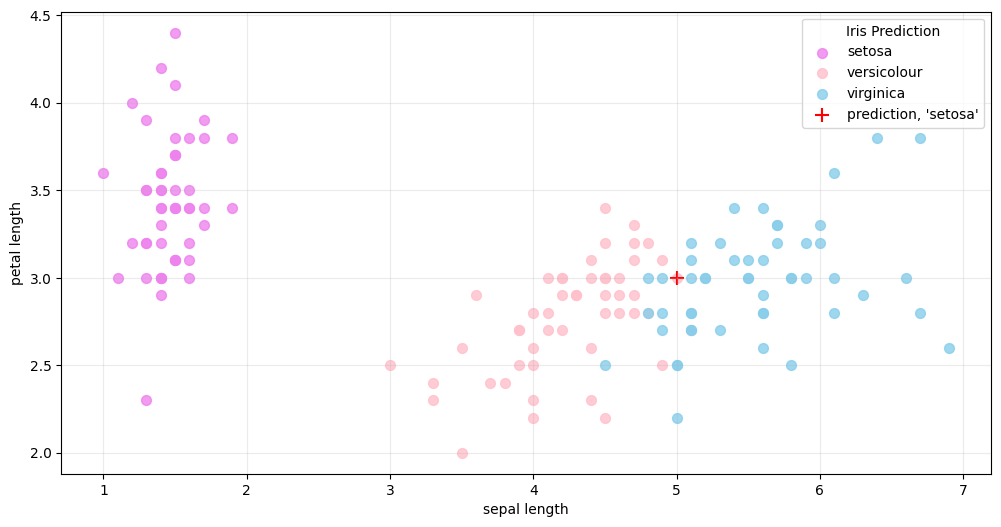

In [64]:
# init a testset
index = random.randrange(0, 50)
test_x, test_y = testset[index]

labels = ["setosa","versicolour","virginica"] # ordinal linear regressor
setosa = np.array([list(trainset.x[_]) for _ in range(trainset.__len__()) if trainset.y[_] == 0])
versicolour = np.array([list(trainset.x[_]) for _ in range(trainset.__len__()) if trainset.y[_] == 1])
virginica = np.array([list(trainset.x[_]) for _ in range(trainset.__len__()) if trainset.y[_] == 2])
pred = model(test_x)

fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
ax1.set_xlabel('sepal length')
ax1.set_ylabel('petal length')
ax1.grid(True, alpha=0.25)

ax1.scatter(x=setosa[:, 2], y=setosa[:, 1], s=50, alpha=0.8, c="violet", label="setosa")
ax1.scatter(x=versicolour[:, 2], y=versicolour[:, 1], s=50, alpha=0.8, c="pink", label="versicolour")
ax1.scatter(x=virginica[:, 2], y=virginica[:, 1], s=50, alpha=0.8, c="skyblue", label="virginica")
ax1.scatter(x=test_x[0], y=test_x[1], s=100, alpha=1, c="r", marker="+", label=f"prediction, '{labels[int(model(test_x)) if pred < 2 else 2]}'")
ax1.legend(fontsize="10", loc="best", title="Iris Prediction")

In [65]:
print(f"predicted class: {int(np.round(pred))} actual class: {test_y}")

predicted class: 0 actual class: 0
